Epoch 1/50
264/264 [==============================] - 7s 16ms/step - loss: 0.0018
Epoch 2/50
264/264 [==============================] - 4s 14ms/step - loss: 3.6038e-04
Epoch 3/50
264/264 [==============================] - 4s 15ms/step - loss: 3.6430e-04
Epoch 4/50
264/264 [==============================] - 4s 17ms/step - loss: 3.7018e-04
Epoch 5/50
264/264 [==============================] - 4s 14ms/step - loss: 3.7269e-04
Epoch 6/50
264/264 [==============================] - 4s 15ms/step - loss: 3.6246e-04
Epoch 7/50
264/264 [==============================] - 5s 18ms/step - loss: 3.8001e-04
Epoch 8/50
264/264 [==============================] - 4s 14ms/step - loss: 3.7038e-04
Epoch 9/50
264/264 [==============================] - 4s 14ms/step - loss: 3.6124e-04
Epoch 10/50
264/264 [==============================] - 5s 18ms/step - loss: 3.6641e-04
Epoch 11/50
264/264 [==============================] - 4s 14ms/step - loss: 3.6565e-04
Epoch 12/50
264/264 [==============================] - 4

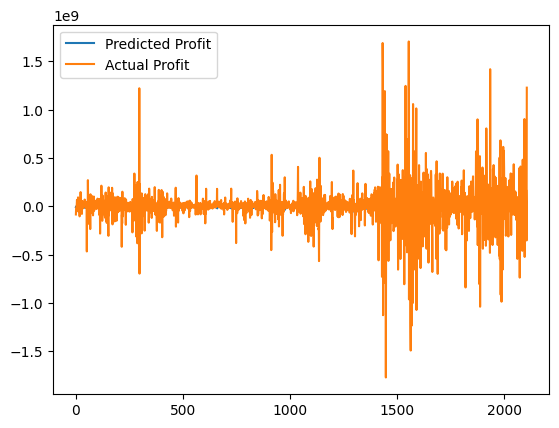

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Загрузка данных
data = pd.read_csv('applerevenue .csv')

# Подготовка данных
prices = data[['open', 'close']].values
volume = data['volume'].values
profit = volume * (prices[:, 1] - prices[:, 0])

# Масштабирование данных
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_profit = scaler.fit_transform(profit.reshape(-1, 1))

# Создание обучающего набора данных
lookback = 30  # количество предыдущих дней, используемых для предсказания
X = []
y = []
for i in range(lookback, len(scaled_profit)):
    X.append(scaled_profit[i - lookback:i, 0])
    y.append(scaled_profit[i, 0])
X, y = np.array(X), np.array(y)

# Разделение данных на обучающий и тестовый наборы
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Создание и обучение модели LSTM
model = Sequential()
model.add(LSTM(50, input_shape=(lookback, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Получение предсказаний на тестовом наборе
predictions = model.predict(X_test)

# Обратное масштабирование предсказаний
predictions = scaler.inverse_transform(predictions)

# Визуализация результатов
plt.plot(predictions, label='Predicted Profit')
plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual Profit')
plt.legend()
plt.show()


Epoch 1/100
211/211 [==============================] - 7s 21ms/step - loss: 0.0034 - val_loss: 0.0016
Epoch 2/100
211/211 [==============================] - 4s 17ms/step - loss: 3.9274e-05 - val_loss: 0.0016
Epoch 3/100
211/211 [==============================] - 3s 15ms/step - loss: 3.9949e-05 - val_loss: 0.0016
Epoch 4/100
211/211 [==============================] - 3s 15ms/step - loss: 4.0140e-05 - val_loss: 0.0016
Epoch 5/100
211/211 [==============================] - 5s 23ms/step - loss: 4.0468e-05 - val_loss: 0.0016
Epoch 6/100
211/211 [==============================] - 4s 19ms/step - loss: 4.1379e-05 - val_loss: 0.0016
Epoch 7/100
211/211 [==============================] - 3s 16ms/step - loss: 4.0944e-05 - val_loss: 0.0016
Epoch 8/100
211/211 [==============================] - 4s 21ms/step - loss: 4.1361e-05 - val_loss: 0.0016
Epoch 9/100
211/211 [==============================] - 3s 15ms/step - loss: 4.3573e-05 - val_loss: 0.0016
Epoch 10/100
211/211 [============================

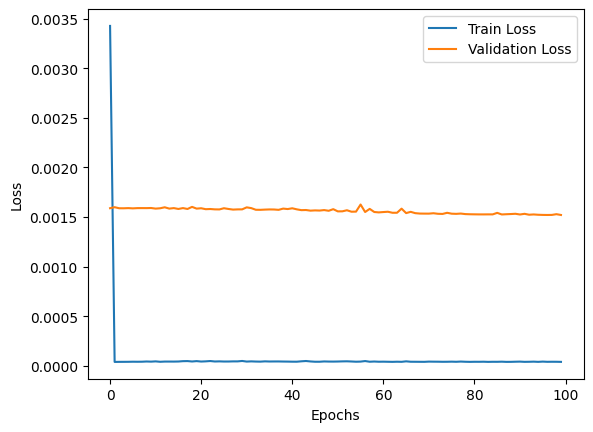

66/66 [==============================] - 1s 5ms/step


<ipython-input-2-9b60aa91669a>:59: RuntimeWarning: divide by zero encountered in true_divide
  accuracy = np.mean(np.abs(predictions - y_test) / y_test) * 100


Точность предсказания: inf%


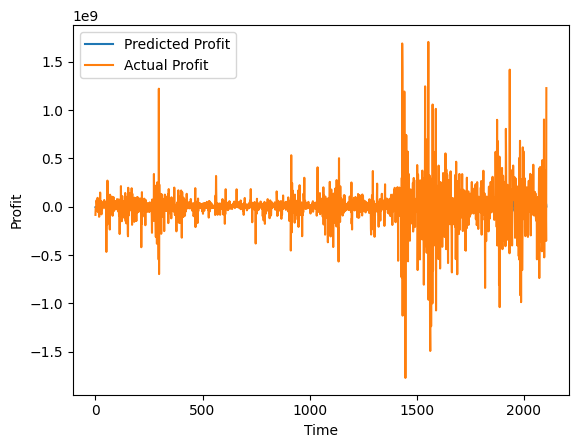

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Загрузка данных
data = pd.read_csv('applerevenue .csv')

# Подготовка данных
prices = data[['open', 'close']].values
volume = data['volume'].values
profit = volume * (prices[:, 1] - prices[:, 0])

# Масштабирование данных
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_profit = scaler.fit_transform(profit.reshape(-1, 1))

# Создание обучающего набора данных
lookback = 30  # количество предыдущих дней, используемых для предсказания
X = []
y = []
for i in range(lookback, len(scaled_profit)):
    X.append(scaled_profit[i - lookback:i, 0])
    y.append(scaled_profit[i, 0])
X, y = np.array(X), np.array(y)

# Разделение данных на обучающий и тестовый наборы
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Создание и обучение модели LSTM
model = Sequential()
model.add(LSTM(50, input_shape=(lookback, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Визуализация процесса обучения
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Получение предсказаний на тестовом наборе
predictions = model.predict(X_test)

# Обратное масштабирование предсказаний
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Вычисление точности предсказания в процентах
accuracy = np.mean(np.abs(predictions - y_test) / y_test) * 100
print(f'Точность предсказания: {accuracy:.2f}%')

# Визуализация результатов
plt.plot(predictions, label='Predicted Profit')
plt.plot(y_test, label='Actual Profit')
plt.xlabel('Time')
plt.ylabel('Profit')
plt.legend()
plt.show()


Epoch 1/50
211/211 [==============================] - 15s 48ms/step - loss: 0.0062 - val_loss: 0.0015
Epoch 2/50
211/211 [==============================] - 9s 42ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 3/50
211/211 [==============================] - 8s 40ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 4/50
211/211 [==============================] - 8s 37ms/step - loss: 0.0010 - val_loss: 0.0017
Epoch 5/50
211/211 [==============================] - 9s 42ms/step - loss: 9.4121e-04 - val_loss: 0.0015
Epoch 6/50
211/211 [==============================] - 8s 39ms/step - loss: 8.6498e-04 - val_loss: 0.0015
Epoch 7/50
211/211 [==============================] - 8s 39ms/step - loss: 7.9318e-04 - val_loss: 0.0015
Epoch 8/50
211/211 [==============================] - 9s 43ms/step - loss: 6.9636e-04 - val_loss: 0.0015
Epoch 9/50
211/211 [==============================] - 8s 39ms/step - loss: 6.2204e-04 - val_loss: 0.0017
Epoch 10/50
211/211 [==============================] - 8s 39ms/step - 

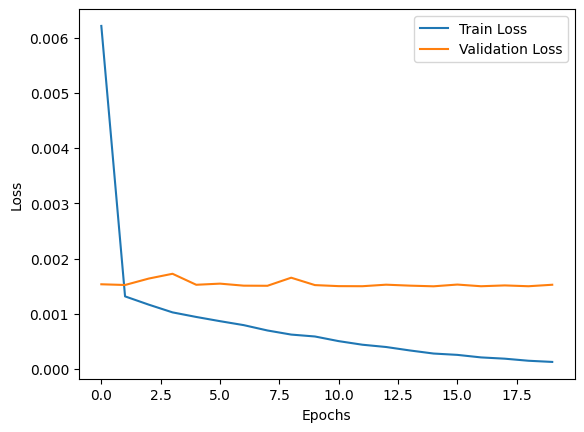

66/66 [==============================] - 2s 16ms/step
Точность предсказания: inf%


<ipython-input-3-5ca5b6e8a88a>:64: RuntimeWarning: divide by zero encountered in true_divide
  accuracy = np.mean(np.abs(predictions - y_test) / y_test) * 100


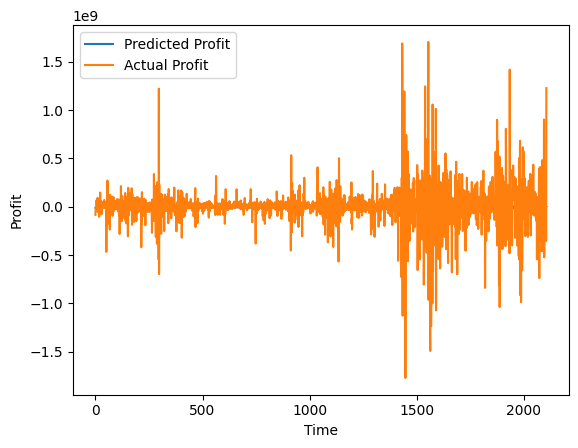

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Загрузка данных
data = pd.read_csv('applerevenue .csv')

# Подготовка данных
prices = data[['open', 'close']].values
volume = data['volume'].values
profit = volume * (prices[:, 1] - prices[:, 0])

# Масштабирование данных
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_profit = scaler.fit_transform(profit.reshape(-1, 1))

# Создание обучающего набора данных
lookback = 30  # количество предыдущих дней, используемых для предсказания
X = []
y = []
for i in range(lookback, len(scaled_profit)):
    X.append(scaled_profit[i - lookback:i, 0])
    y.append(scaled_profit[i, 0])
X, y = np.array(X), np.array(y)

# Разделение данных на обучающий и тестовый наборы
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Создание и обучение модели LSTM
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(lookback, 1)))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(1))
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Визуализация процесса обучения
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Получение предсказаний на тестовом наборе
predictions = model.predict(X_test)

# Обратное масштабирование предсказаний
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Вычисление точности предсказания в процентах
accuracy = np.mean(np.abs(predictions - y_test) / y_test) * 100
print(f'Точность предсказания: {accuracy:.2f}%')

# Визуализация результатов
plt.plot(predictions, label='Predicted Profit')
plt.plot(y_test, label='Actual Profit')
plt.xlabel('Time')
plt.ylabel('Profit')
plt.legend()
plt.show()


Epoch 1/50
211/211 [==============================] - 24s 86ms/step - loss: 0.1305 - val_loss: 0.0190
Epoch 2/50
211/211 [==============================] - 23s 109ms/step - loss: 0.0241 - val_loss: 0.0203
Epoch 3/50
211/211 [==============================] - 17s 79ms/step - loss: 0.0175 - val_loss: 0.0187
Epoch 4/50
211/211 [==============================] - 17s 78ms/step - loss: 0.0143 - val_loss: 0.0141
Epoch 5/50
211/211 [==============================] - 18s 84ms/step - loss: 0.0121 - val_loss: 0.0224
Epoch 6/50
211/211 [==============================] - 17s 81ms/step - loss: 0.0102 - val_loss: 0.0130
Epoch 7/50
211/211 [==============================] - 18s 83ms/step - loss: 0.0085 - val_loss: 0.0092
Epoch 8/50
211/211 [==============================] - 18s 84ms/step - loss: 0.0070 - val_loss: 0.0091
Epoch 9/50
211/211 [==============================] - 16s 78ms/step - loss: 0.0056 - val_loss: 0.0079
Epoch 10/50
211/211 [==============================] - 16s 78ms/step - loss: 0.00

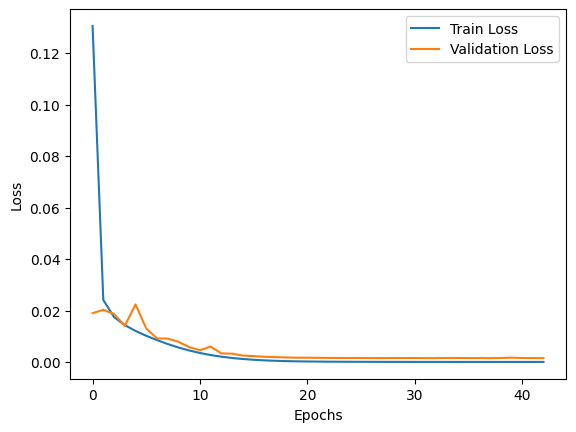

66/66 [==============================] - 1s 12ms/step


<ipython-input-4-d856114583a9>:65: RuntimeWarning: divide by zero encountered in true_divide
  accuracy = np.mean(np.abs(predictions - y_test) / y_test) * 100


Точность предсказания: inf%


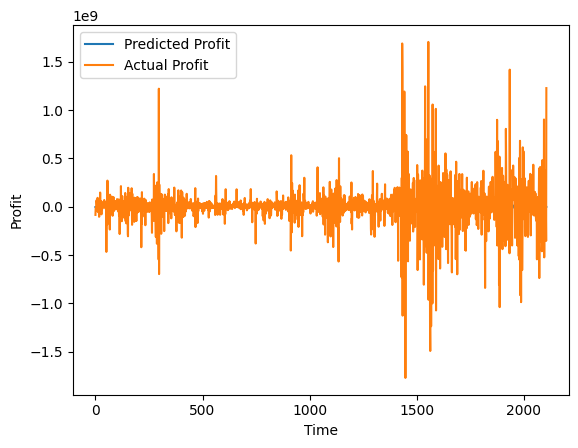

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1, l2

# Загрузка данных
data = pd.read_csv('applerevenue .csv')

# Подготовка данных
prices = data[['open', 'close']].values
volume = data['volume'].values
profit = volume * (prices[:, 1] - prices[:, 0])

# Масштабирование данных
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_profit = scaler.fit_transform(profit.reshape(-1, 1))

# Создание обучающего набора данных
lookback = 30  # количество предыдущих дней, используемых для предсказания
X = []
y = []
for i in range(lookback, len(scaled_profit)):
    X.append(scaled_profit[i - lookback:i, 0])
    y.append(scaled_profit[i, 0])
X, y = np.array(X), np.array(y)

# Разделение данных на обучающий и тестовый наборы
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Создание и обучение модели LSTM
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(lookback, 1), recurrent_dropout=0.2))
model.add(BatchNormalization())
model.add(LSTM(64, recurrent_dropout=0.2))
model.add(BatchNormalization())
model.add(Dense(1, kernel_regularizer=l2(0.01)))
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Визуализация процесса обучения
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Получение предсказаний на тестовом наборе
predictions = model.predict(X_test)

# Обратное масштабирование предсказаний
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Вычисление точности предсказания в процентах
accuracy = np.mean(np.abs(predictions - y_test) / y_test) * 100
print(f'Точность предсказания: {accuracy:.2f}%')

# Визуализация результатов
plt.plot(predictions, label='Predicted Profit')
plt.plot(y_test, label='Actual Profit')
plt.xlabel('Time')
plt.ylabel('Profit')
plt.legend()
plt.show()
